<a href="https://colab.research.google.com/github/skdding3/Code-Practice/blob/main/ML/Classification_evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

Wisconsin Breast Cancer

In [ ]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('target', axis=1))

x_train, x_valid, y_train, y_valid = train_test_split(scaled, df['target'],  random_state=10)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_valid)

In [ ]:
# 정확도 측정
accuracy_score(y_valid, pred)

0.958041958041958

오차 행렬 (confusion matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, pred)

cm

array([[50,  2],
       [ 4, 87]])

Text(33.0, 0.5, 'Actual')

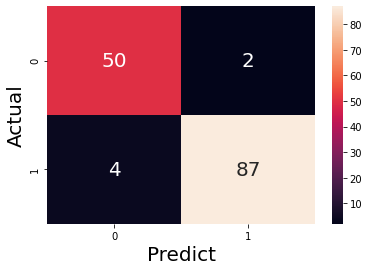

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True, annot_kws={"size": 20})
plt.xlabel('Predict', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [ ]:
TN, FP, FN, TP = cm.ravel()

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

precision = TP / (FP + TP)

precision

0.9775280898876404

In [ ]:
from sklearn.metrics import precision_score  #정밀도

precision_score(y_valid, pred)

0.9775280898876404

recall

In [ ]:
recall = TP / (FN + TP)

recall

0.9560439560439561

F1 score

정밀도와 재현율을 결합한 지표이며, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값

threshold 변화

In [ ]:
2 * (precision * recall) / (precision + recall)

0.9666666666666667

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_valid, pred)

0.9666666666666667